In [1]:
import pandas as pd
df = pd.read_csv('ai_art.csv')

In [2]:
data_types = df.dtypes
print("Data Types:\n", data_types)

Data Types:
 Artwork_ID           object
Artist_Name          object
Art_Style            object
Creation_Date        object
Medium               object
Tools_Used           object
Popularity_Score    float64
Region               object
Art_Genre            object
Platform             object
Description          object
Image_URL            object
dtype: object


In [3]:
duplicates = df.duplicated().sum()
print("Number of Duplicates:", duplicates)

Number of Duplicates: 0


In [4]:
df.head()

,Artwork_ID,Artist_Name,Art_Style,Creation_Date,Medium,Tools_Used,Popularity_Score,Region,Art_Genre,Platform,Description,Image_URL
0,ART-00001,DALL-E,Conceptual,2023-03-11,Collage,GANPaint,1604.25,South America,Urban,Instagram,A mesmerizing piece of art that blends traditi...,https://example.com/artwork/00001.jpg
1,ART-00002,AbstractoBot,Futurism,2022-11-27,Oil Paint,MidJourney,4162.12,North America,Abstract,Dribbble,A mesmerizing piece of art that blends traditi...,https://example.com/artwork/00002.jpg
2,ART-00003,Vincent,Futurism,2024-03-13,Charcoal,GANPaint,2989.38,Europe,Mythology,Reddit,A mesmerizing piece of art that blends traditi...,https://example.com/artwork/00003.jpg
3,ART-00004,ArtBreeder,Impressionism,2022-09-12,Pencil Sketch,ArtBreeder,2985.97,Europe,Still Life,Tumblr,A mesmerizing piece of art that blends traditi...,https://example.com/artwork/00004.jpg
4,ART-00005,DALL-E,Surrealism,2022-12-05,Collage,DeepDream,2035.18,Asia,Conceptual,DeviantArt,A mesmerizing piece of art that blends traditi...,https://example.com/artwork/00005.jpg


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artwork_ID        10000 non-null  object 
 1   Artist_Name       10000 non-null  object 
 2   Art_Style         10000 non-null  object 
 3   Creation_Date     10000 non-null  object 
 4   Medium            10000 non-null  object 
 5   Tools_Used        10000 non-null  object 
 6   Popularity_Score  10000 non-null  float64
 7   Region            10000 non-null  object 
 8   Art_Genre         10000 non-null  object 
 9   Platform          10000 non-null  object 
 10  Description       10000 non-null  object 
 11  Image_URL         10000 non-null  object 
dtypes: float64(1), object(11)
memory usage: 937.6+ KB


In [6]:
df.describe()

,Popularity_Score
count,10000.000000
mean,2508.190738
std,1430.922879
min,50.850000
25%,1267.712500
50%,2492.025000
75%,3763.245000
max,4999.620000


In [7]:
print("Column Names:", df.columns.tolist())

Column Names: ['Artwork_ID', 'Artist_Name', 'Art_Style', 'Creation_Date', 'Medium', 'Tools_Used', 'Popularity_Score', 'Region', 'Art_Genre', 'Platform', 'Description', 'Image_URL']


In [8]:
print("Shape of DataFrame:", df.shape)

Shape of DataFrame: (10000, 12)


In [9]:
print(df.sample(5))

     Artwork_ID  Artist_Name      Art_Style Creation_Date       Medium  \
1539  ART-01540   ArtBreeder     Surrealism    2024-06-15    Oil Paint   
161   ART-00162      DeepArt       Abstract    2023-02-18     Charcoal   
9363  ART-09364       DALL-E  Impressionism    2024-02-13   Watercolor   
2897  ART-02898  AIArtist123     Conceptual    2024-07-04  Mixed Media   
54    ART-00055   MidJourney        Realism    2023-04-03      Collage   

      Tools_Used  Popularity_Score         Region   Art_Genre   Platform  \
1539      DALL-E           4187.99        Oceania     Fantasy   Dribbble   
161     GANPaint           1483.36  South America  Still Life     Tumblr   
9363  ArtBreeder           1831.73           Asia   Landscape     Flickr   
2897      DALL-E            184.12  South America      Nature  Pinterest   
54    ArtBreeder           4155.49  North America   Landscape    Behance   

                                            Description  \
1539  A mesmerizing piece of art that b

In [10]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Artwork_ID          0
Artist_Name         0
Art_Style           0
Creation_Date       0
Medium              0
Tools_Used          0
Popularity_Score    0
Region              0
Art_Genre           0
Platform            0
Description         0
Image_URL           0
dtype: int64


In [11]:
df_cleaned_rows = df.dropna()
df_cleaned_columns = df.dropna(axis=1)

In [12]:
from scipy import stats
z_scores = stats.zscore(df.select_dtypes(include=['float64', 'int64']))
df_outliers = df[(z_scores > 3).any(axis=1) | (z_scores < -3).any(axis=1)]
print("Outliers:\n", df_outliers)

Outliers:
 Empty DataFrame
Columns: [Artwork_ID, Artist_Name, Art_Style, Creation_Date, Medium, Tools_Used, Popularity_Score, Region, Art_Genre, Platform, Description, Image_URL]
Index: []


In [13]:
df_no_outliers = df[(z_scores < 3).all(axis=1) & (z_scores > -3).all(axis=1)]

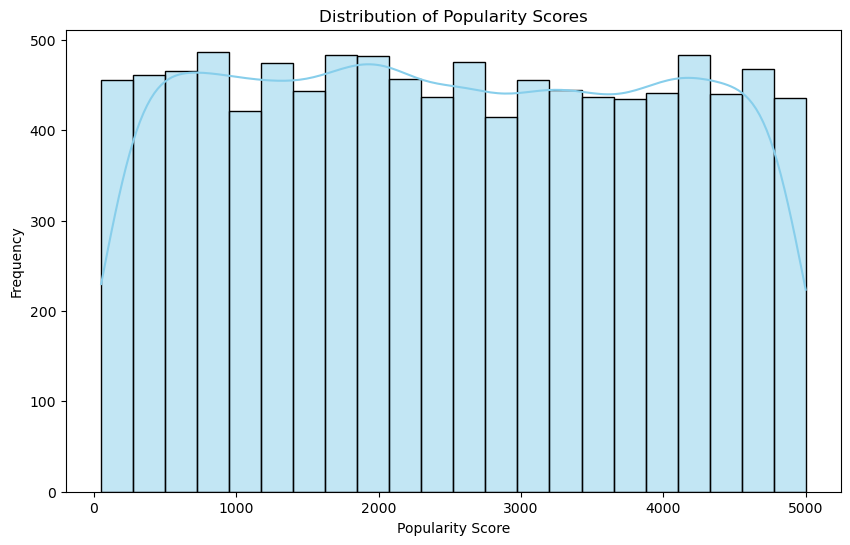

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(10, 6))
sns.histplot(df_no_outliers['Popularity_Score'], kde=True, color='skyblue')
plt.title('Distribution of Popularity Scores')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.show()

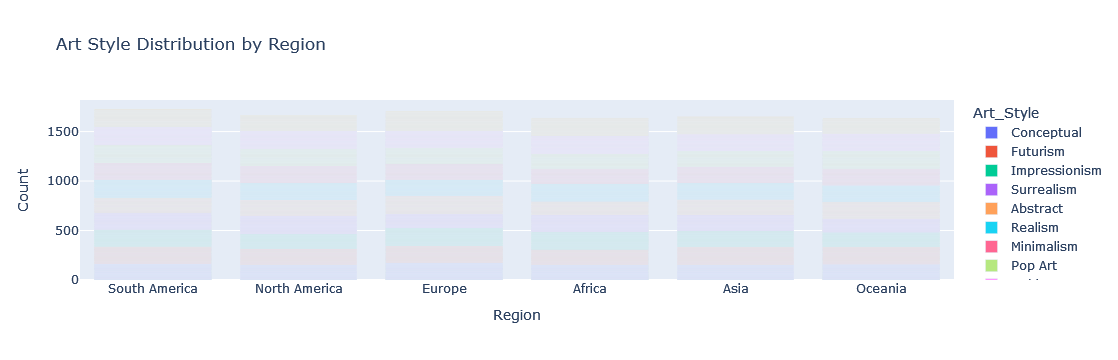

In [17]:
import plotly.express as px
fig = px.bar(df_no_outliers, x='Region', color='Art_Style', 
             title="Art Style Distribution by Region",
             labels={'count': 'Count'})
fig.show()

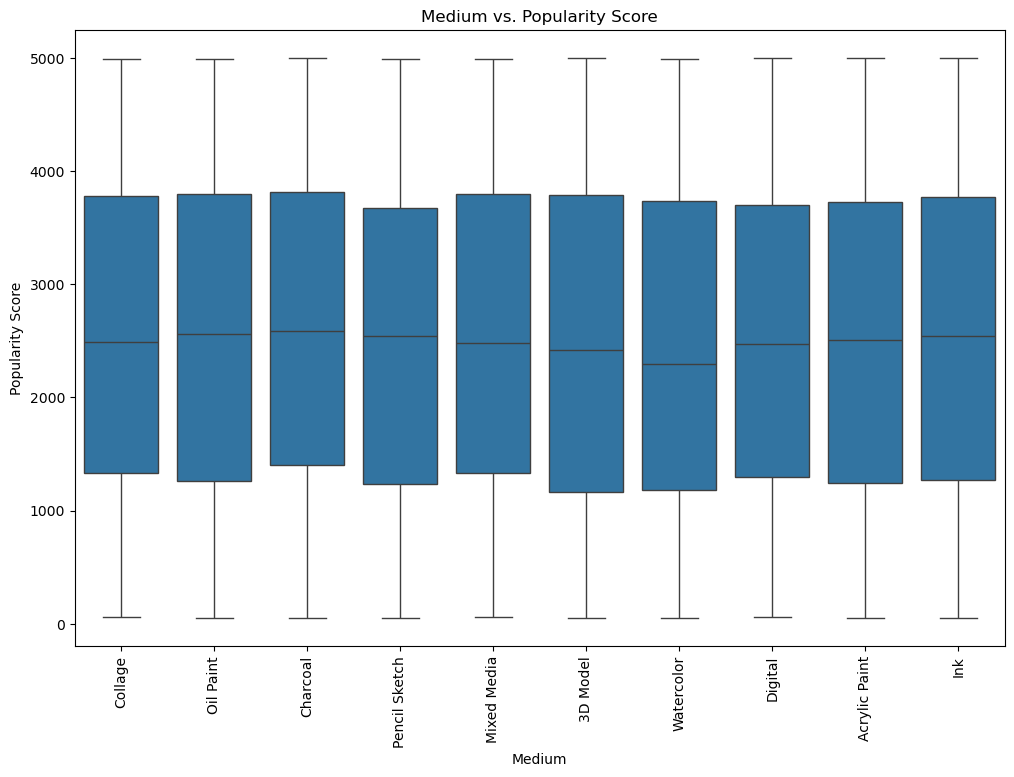

In [18]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Medium', y='Popularity_Score', data=df_no_outliers)
plt.xticks(rotation=90)
plt.title('Medium vs. Popularity Score')
plt.xlabel('Medium')
plt.ylabel('Popularity Score')
plt.show()

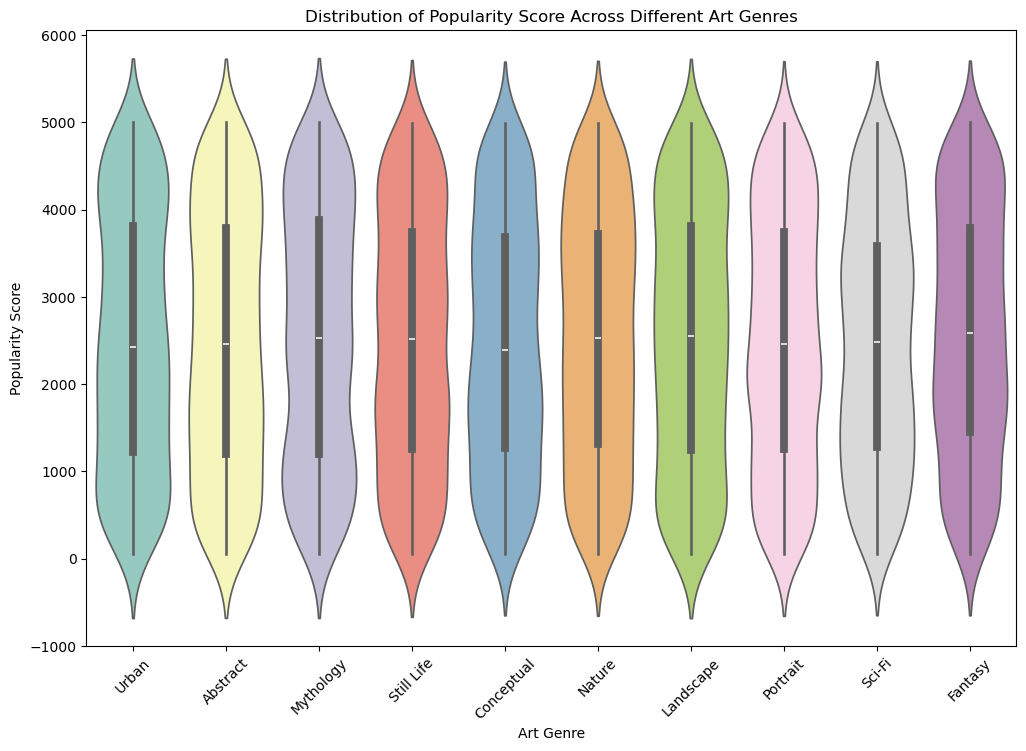

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.violinplot(x='Art_Genre', y='Popularity_Score', data=df_no_outliers, palette='Set3')
plt.title('Distribution of Popularity Score Across Different Art Genres')
plt.xlabel('Art Genre')
plt.ylabel('Popularity Score')
plt.xticks(rotation=45)
plt.show()

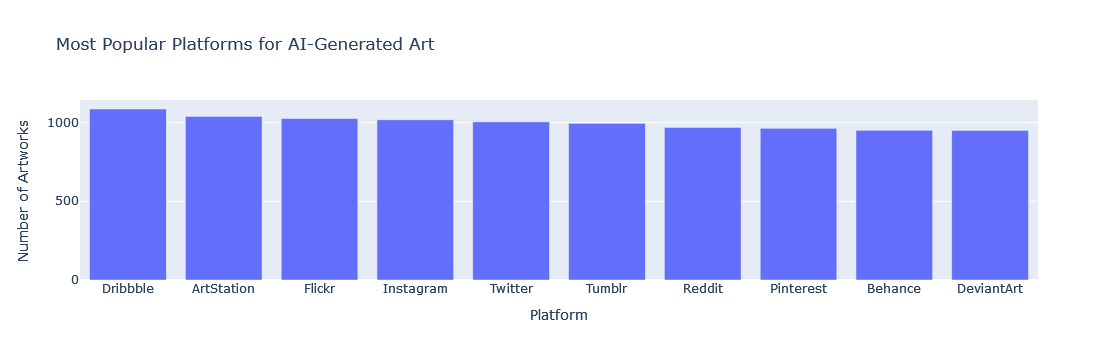

In [20]:
import plotly.express as px
platform_count = df_no_outliers['Platform'].value_counts()

fig = px.bar(platform_count, x=platform_count.index, y=platform_count.values, 
             title="Most Popular Platforms for AI-Generated Art",
             labels={'x': 'Platform', 'y': 'Number of Artworks'})
fig.show()

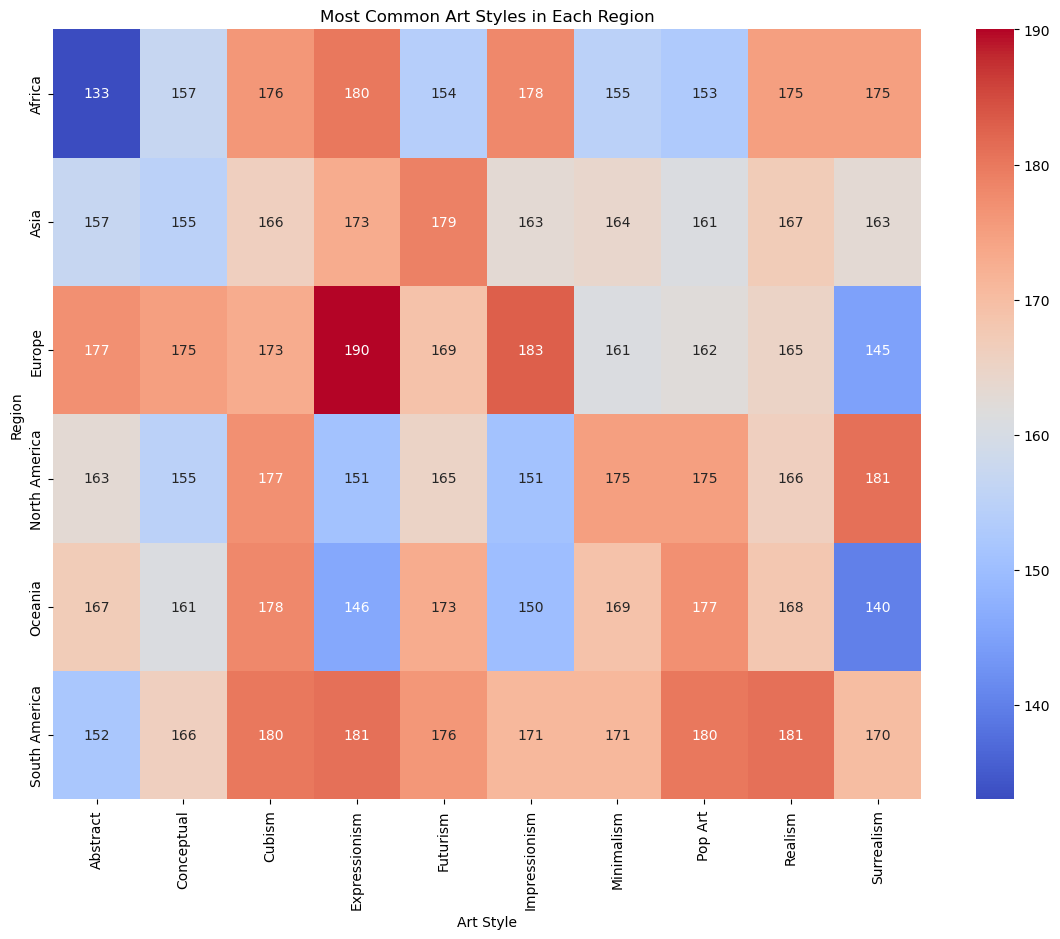

In [21]:
art_style_region = df_no_outliers.groupby(['Region', 'Art_Style']).size().unstack().fillna(0)
plt.figure(figsize=(14, 10))
sns.heatmap(art_style_region, cmap='coolwarm', annot=True, fmt='.0f')
plt.title('Most Common Art Styles in Each Region')
plt.xlabel('Art Style')
plt.ylabel('Region')
plt.show()

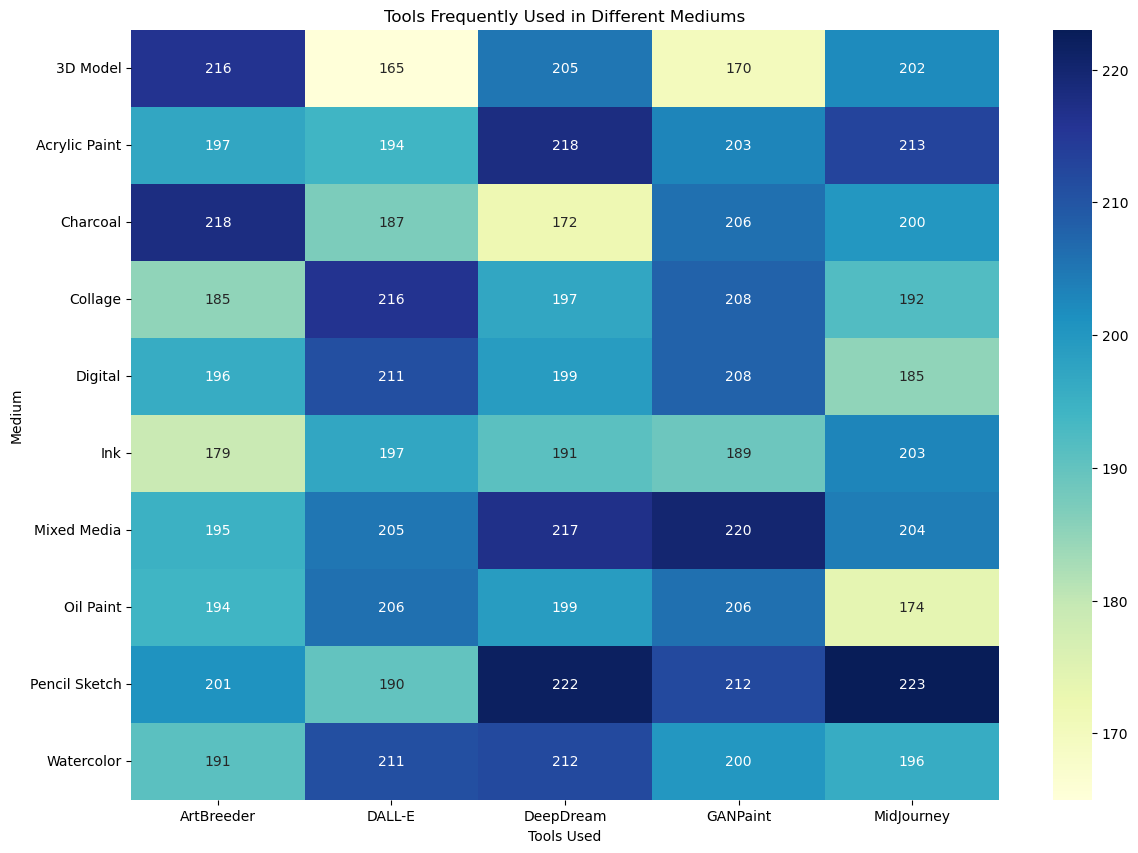

In [22]:
tools_medium = df_no_outliers.groupby(['Medium', 'Tools_Used']).size().unstack().fillna(0)
plt.figure(figsize=(14, 10))
sns.heatmap(tools_medium, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Tools Frequently Used in Different Mediums')
plt.xlabel('Tools Used')
plt.ylabel('Medium')
plt.show()

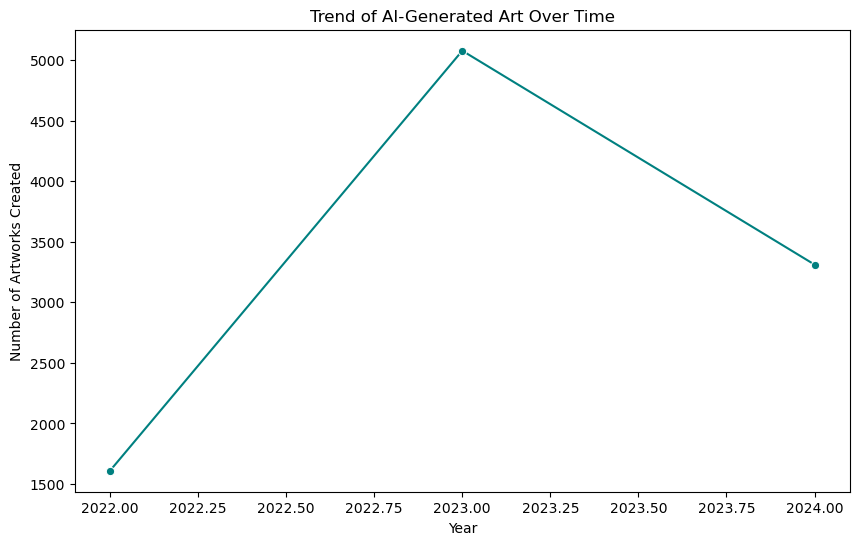

In [23]:
df_no_outliers['Creation_Year'] = pd.to_datetime(df_no_outliers['Creation_Date']).dt.year
creation_trend = df_no_outliers.groupby('Creation_Year').size()

plt.figure(figsize=(10, 6))
sns.lineplot(x=creation_trend.index, y=creation_trend.values, marker='o', color='teal')
plt.title('Trend of AI-Generated Art Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Artworks Created')
plt.show()

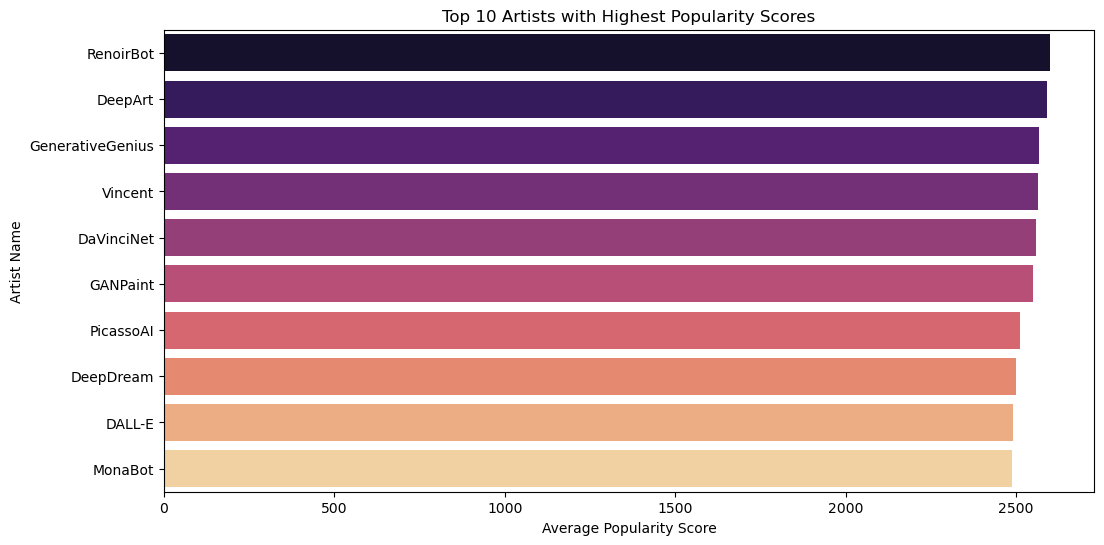

In [24]:
top_artists = df_no_outliers.groupby('Artist_Name')['Popularity_Score'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='magma')
plt.title('Top 10 Artists with Highest Popularity Scores')
plt.xlabel('Average Popularity Score')
plt.ylabel('Artist Name')
plt.show()

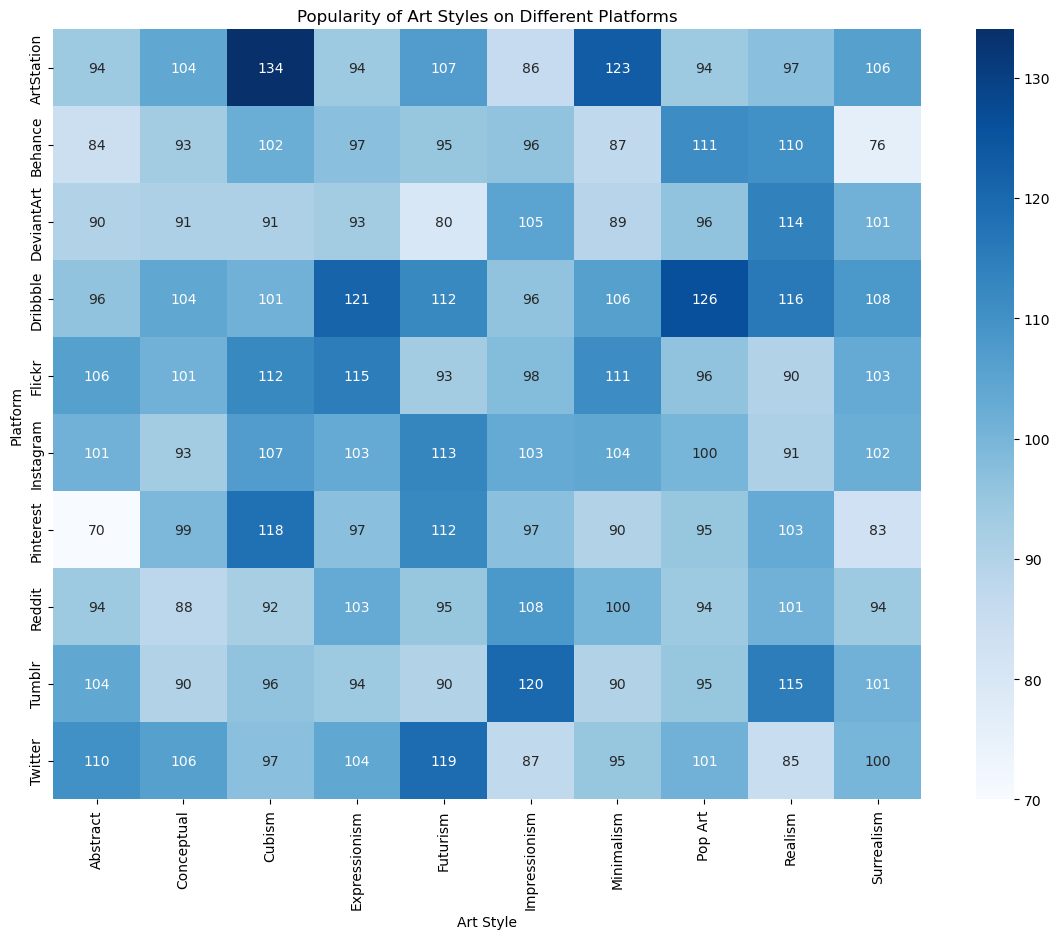

In [25]:
platform_art_style = df_no_outliers.groupby(['Platform', 'Art_Style']).size().unstack().fillna(0)
plt.figure(figsize=(14, 10))
sns.heatmap(platform_art_style, cmap='Blues', annot=True, fmt='.0f')
plt.title('Popularity of Art Styles on Different Platforms')
plt.xlabel('Art Style')
plt.ylabel('Platform')
plt.show()

In [26]:
import numpy as np
from scipy.stats import pearsonr
df_no_outliers['Creation_Year'] = pd.to_datetime(df_no_outliers['Creation_Date']).dt.year
correlation, p_value = pearsonr(df_no_outliers['Popularity_Score'], df_no_outliers['Creation_Year'])

print(f"Correlation between Popularity Score and Creation Date: {correlation:.2f}")
print(f"P-Value: {p_value:.2f}")

Correlation between Popularity Score and Creation Date: 0.00
P-Value: 0.81


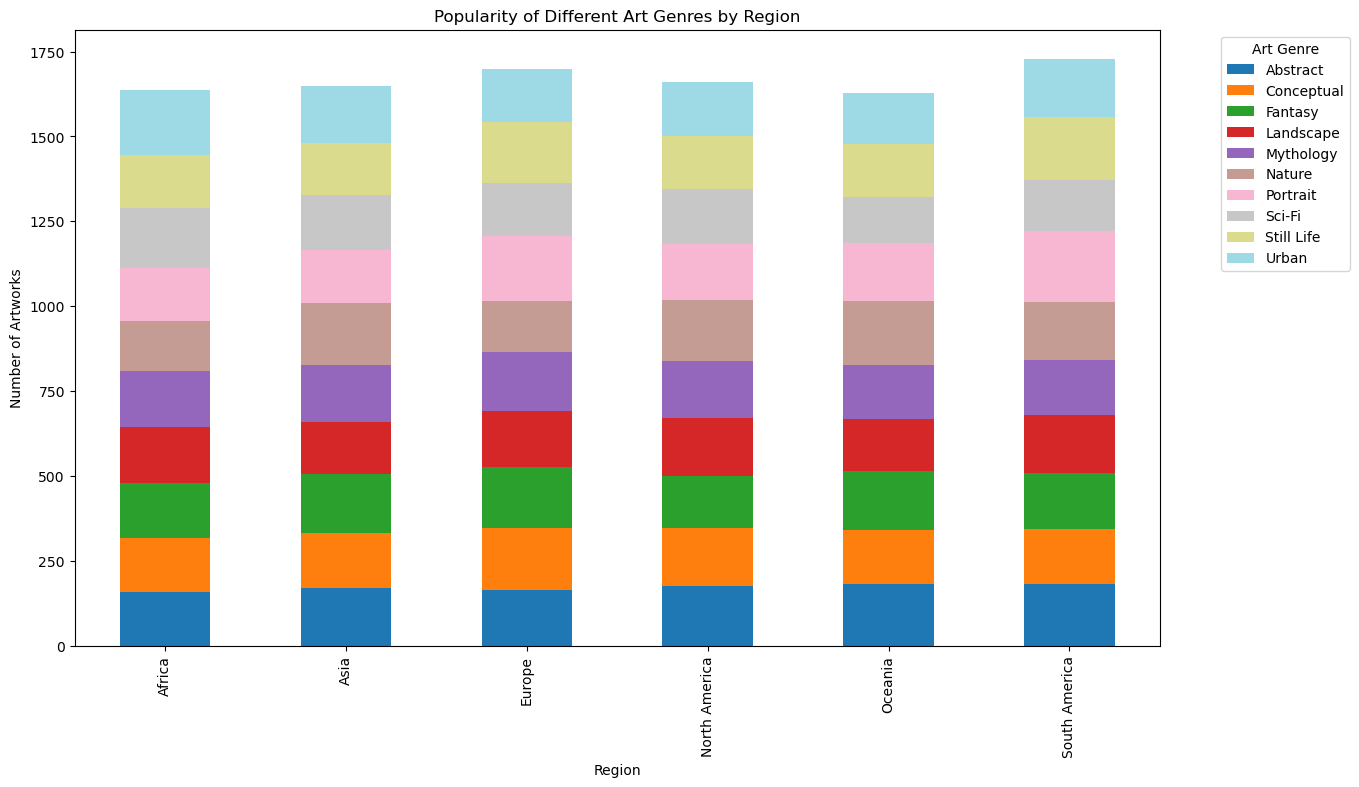

In [27]:
genre_region = df_no_outliers.groupby(['Region', 'Art_Genre']).size().unstack().fillna(0)
genre_region.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title('Popularity of Different Art Genres by Region')
plt.xlabel('Region')
plt.ylabel('Number of Artworks')
plt.legend(title='Art Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

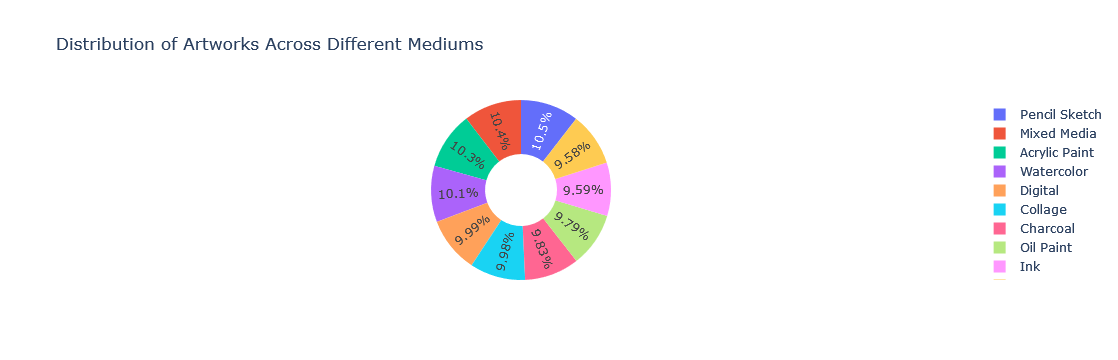

In [28]:
import plotly.express as px
fig = px.pie(df_no_outliers, names='Medium', 
             title="Distribution of Artworks Across Different Mediums",
             hole=0.4)
fig.show()

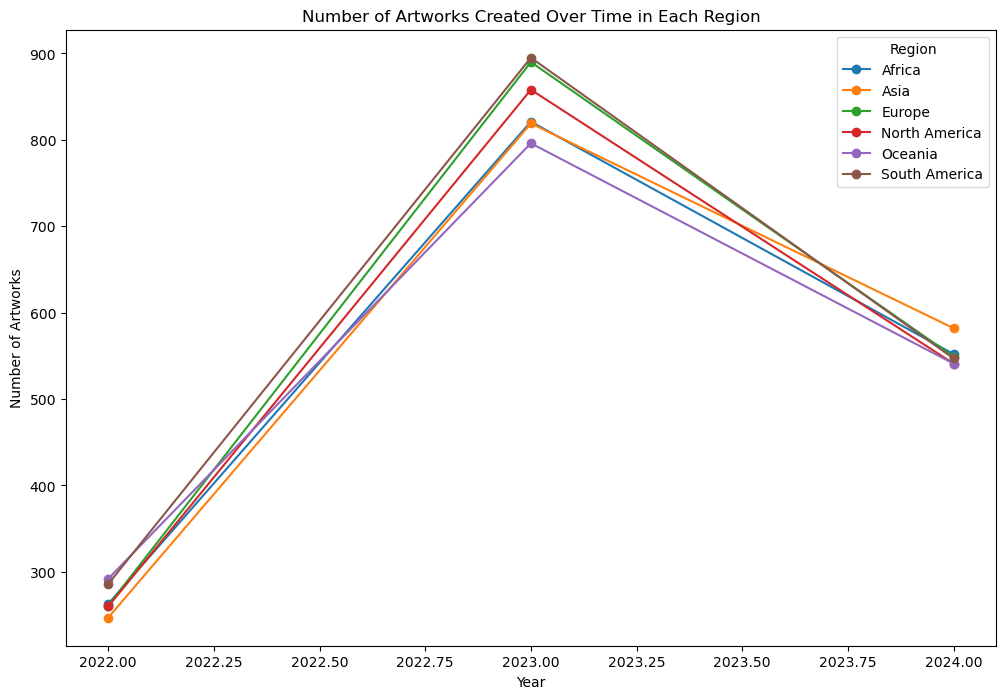

In [29]:
region_time_series = df_no_outliers.groupby(['Creation_Year', 'Region']).size().unstack().fillna(0)
region_time_series.plot(figsize=(12, 8), marker='o')
plt.title('Number of Artworks Created Over Time in Each Region')
plt.xlabel('Year')
plt.ylabel('Number of Artworks')
plt.legend(title='Region')
plt.show()

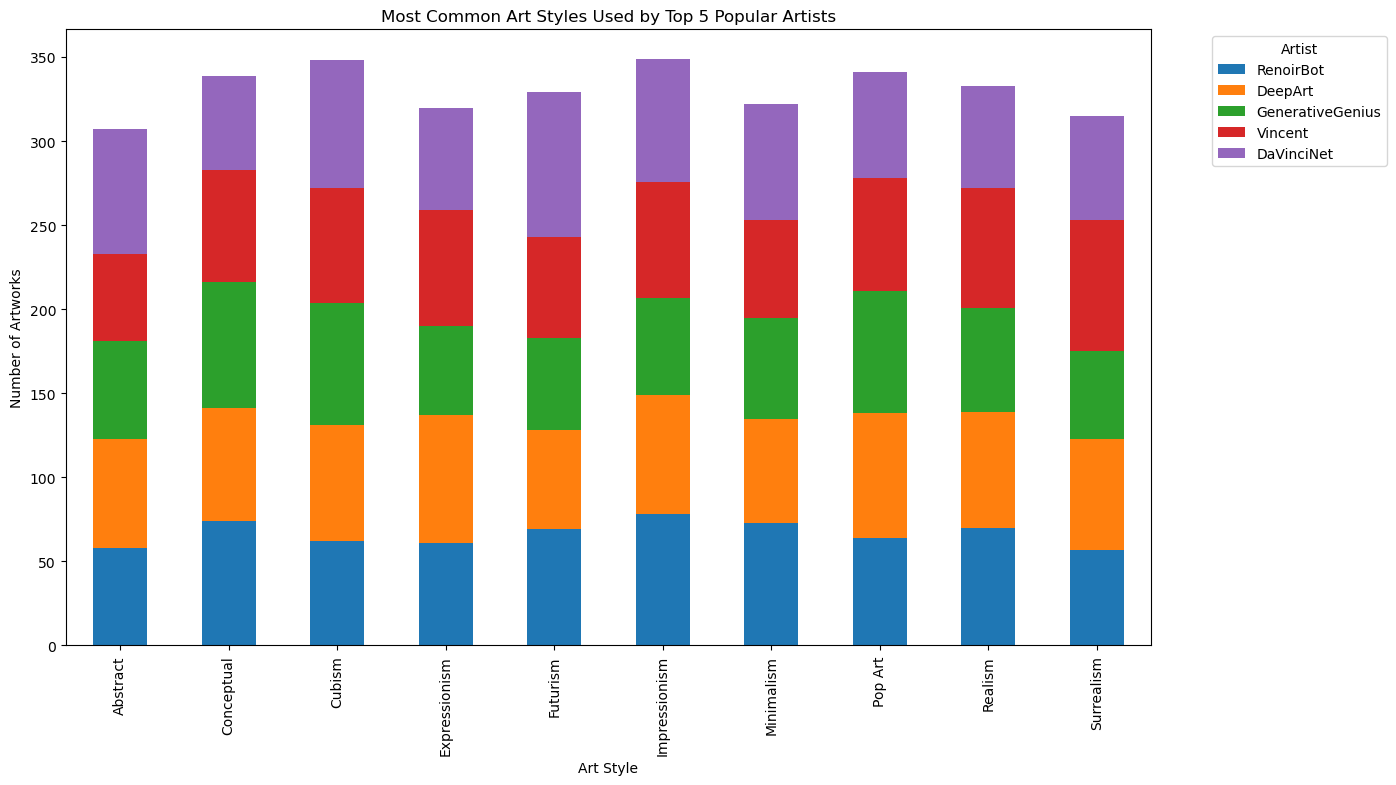

In [30]:
popular_artists_styles = df_no_outliers.groupby(['Artist_Name', 'Art_Style']).size().unstack().fillna(0)
top_5_artists = df_no_outliers.groupby('Artist_Name')['Popularity_Score'].mean().sort_values(ascending=False).head(5).index
popular_artists_styles.loc[top_5_artists].T.plot(kind='bar', figsize=(14, 8), stacked=True)
plt.title('Most Common Art Styles Used by Top 5 Popular Artists')
plt.xlabel('Art Style')
plt.ylabel('Number of Artworks')
plt.legend(title='Artist', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

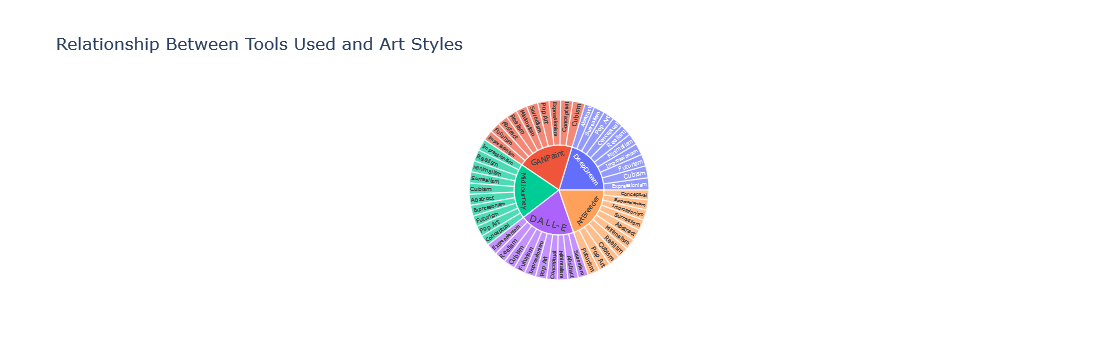

In [31]:
import plotly.express as px
fig = px.sunburst(df_no_outliers, path=['Tools_Used', 'Art_Style'], 
                  title="Relationship Between Tools Used and Art Styles",
                  maxdepth=2)
fig.show()



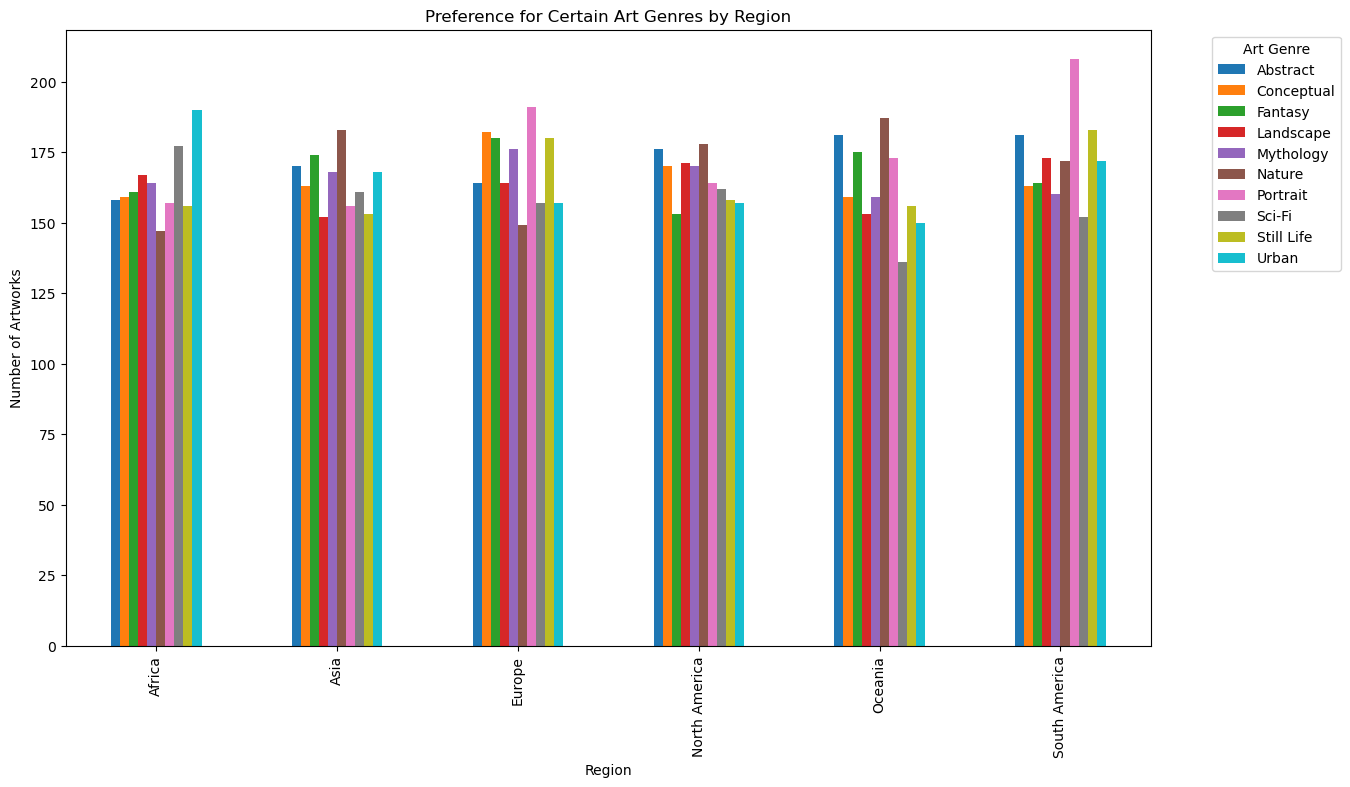

In [32]:
region_genre = df_no_outliers.groupby(['Region', 'Art_Genre']).size().unstack().fillna(0)
region_genre.plot(kind='bar', figsize=(14, 8))
plt.title('Preference for Certain Art Genres by Region')
plt.xlabel('Region')
plt.ylabel('Number of Artworks')
plt.legend(title='Art Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



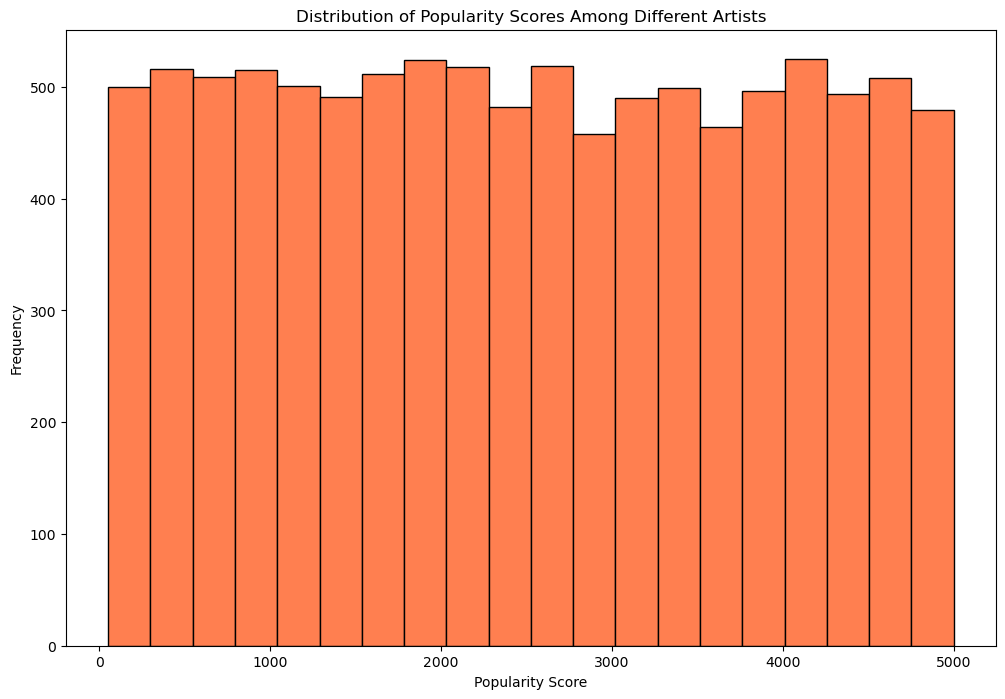

In [34]:
plt.figure(figsize=(12, 8))
df_no_outliers['Popularity_Score'].plot(kind='hist', bins=20, color='coral', edgecolor='black')
plt.title('Distribution of Popularity Scores Among Different Artists')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.show()

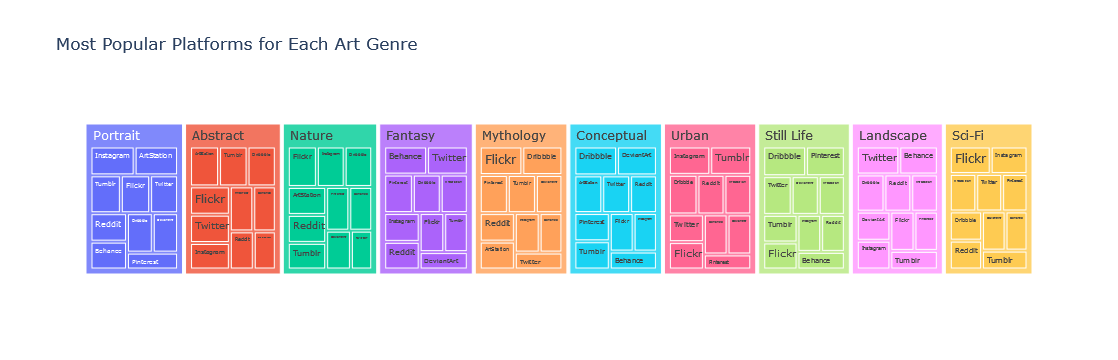

In [35]:
import plotly.express as px
platform_genre = df_no_outliers.groupby(['Platform', 'Art_Genre']).size().reset_index(name='Count')

fig = px.treemap(platform_genre, path=['Art_Genre', 'Platform'], values='Count', 
                 title="Most Popular Platforms for Each Art Genre")
fig.show()

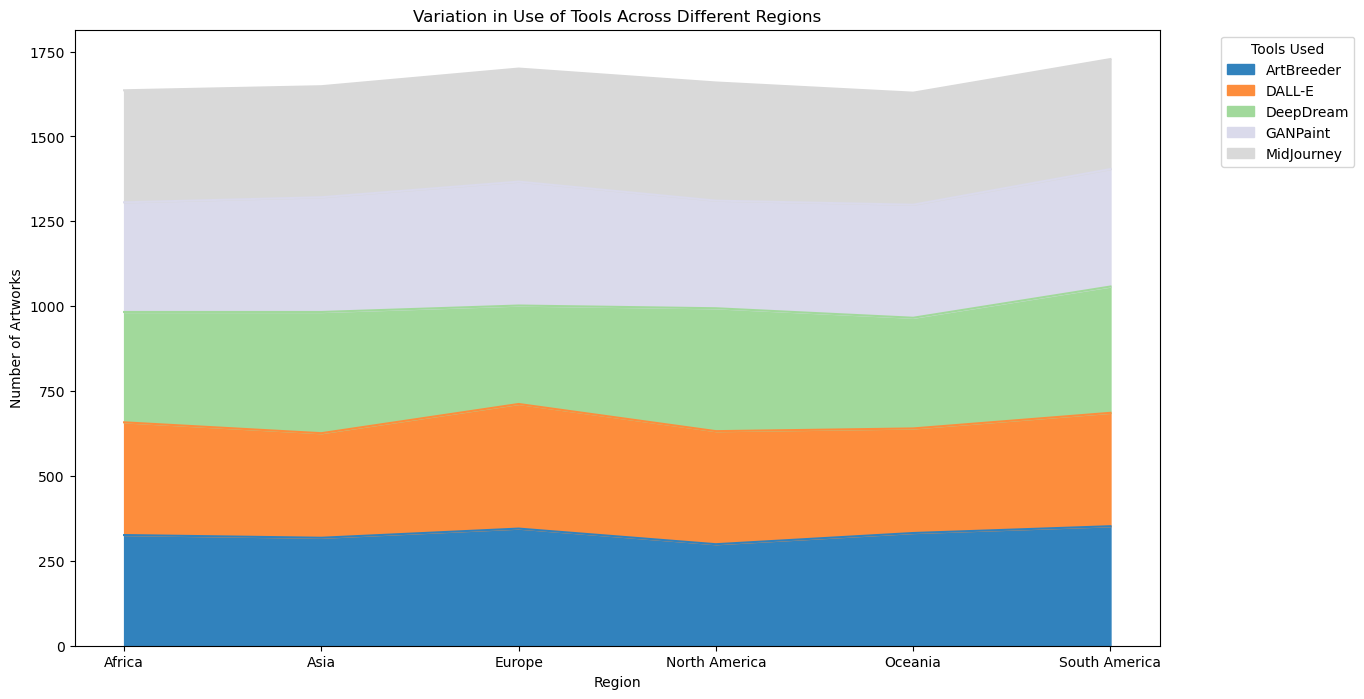

In [36]:
tools_region = df_no_outliers.groupby(['Region', 'Tools_Used']).size().unstack().fillna(0)
tools_region.plot(kind='area', stacked=True, figsize=(14, 8), colormap='tab20c')
plt.title('Variation in Use of Tools Across Different Regions')
plt.xlabel('Region')
plt.ylabel('Number of Artworks')
plt.legend(title='Tools Used', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

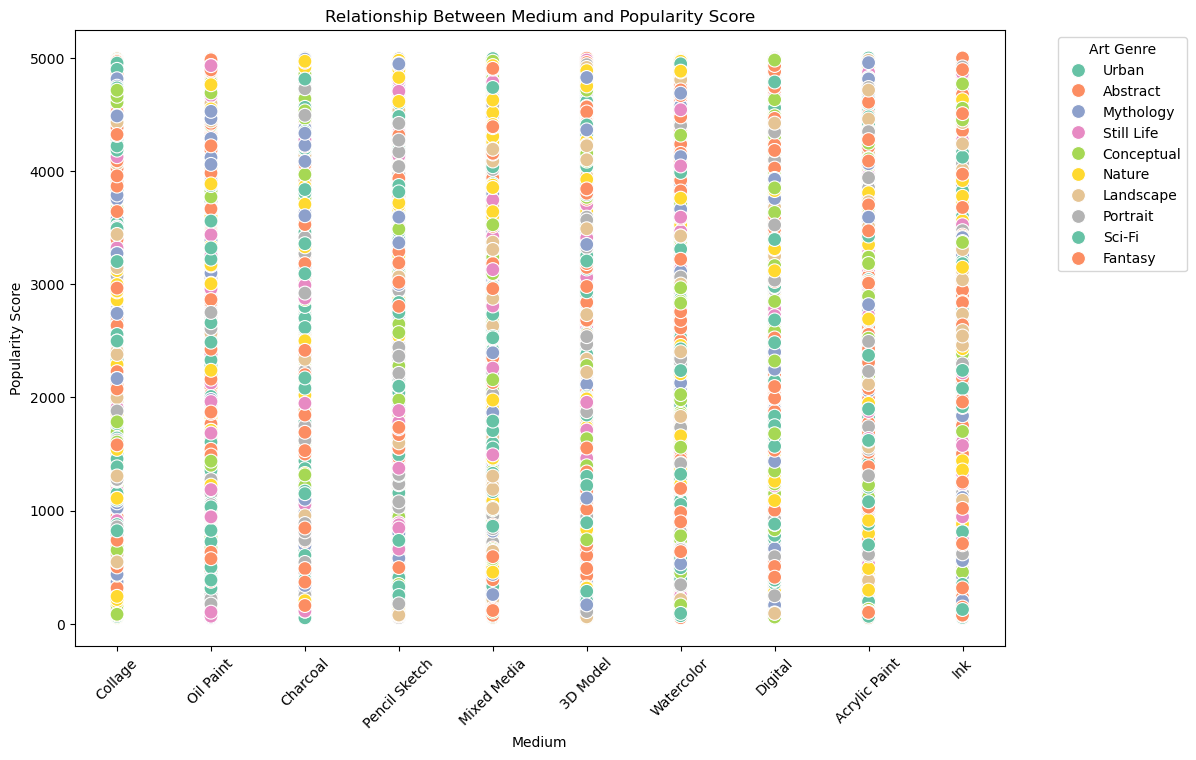

In [37]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Medium', y='Popularity_Score', data=df_no_outliers, hue='Art_Genre', palette='Set2', s=100)
plt.title('Relationship Between Medium and Popularity Score')
plt.xlabel('Medium')
plt.ylabel('Popularity Score')
plt.xticks(rotation=45)
plt.legend(title='Art Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

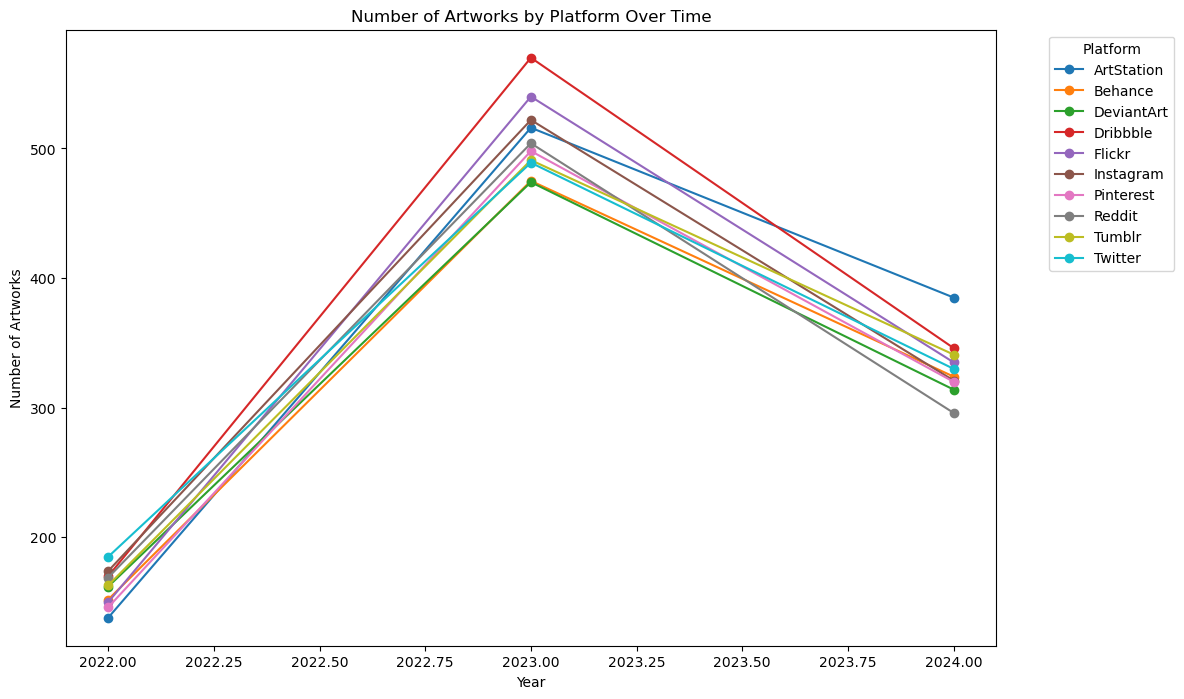

In [38]:
platform_time_series = df_no_outliers.groupby(['Creation_Year', 'Platform']).size().unstack().fillna(0)
platform_time_series.plot(figsize=(12, 8), marker='o')
plt.title('Number of Artworks by Platform Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Artworks')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

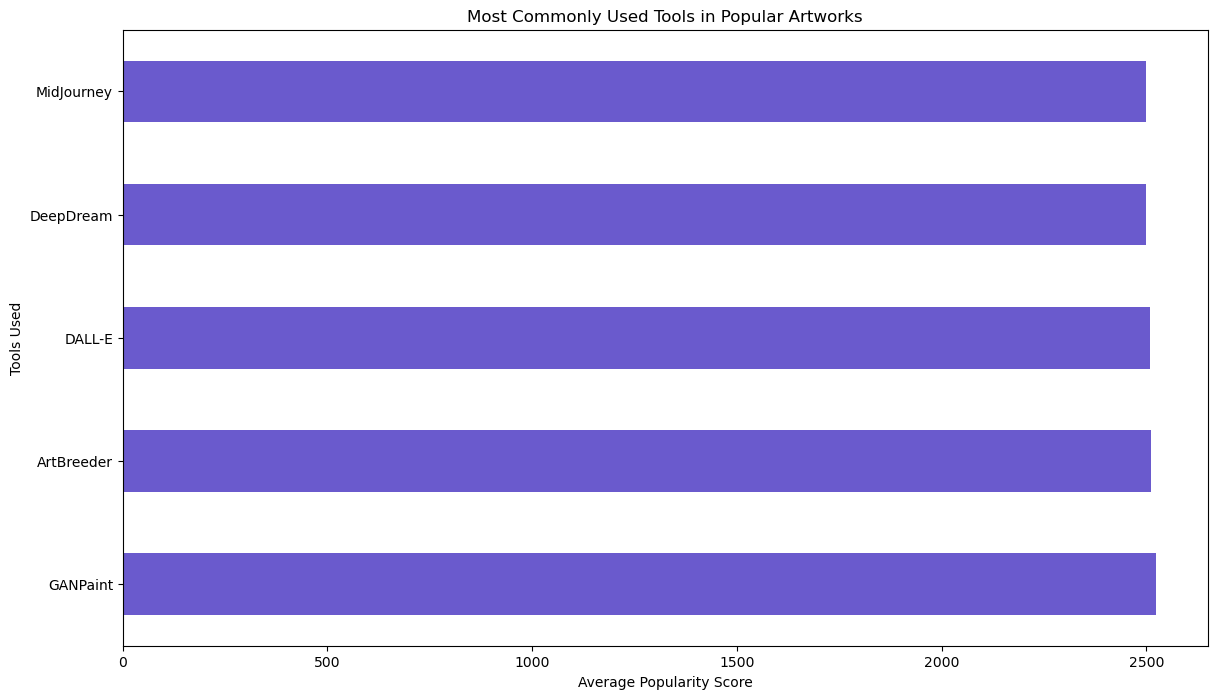

In [39]:
tools_popularity = df_no_outliers.groupby('Tools_Used')['Popularity_Score'].mean().sort_values(ascending=False)
plt.figure(figsize=(14, 8))
tools_popularity.plot(kind='barh', color='slateblue')
plt.title('Most Commonly Used Tools in Popular Artworks')
plt.xlabel('Average Popularity Score')
plt.ylabel('Tools Used')
plt.show()

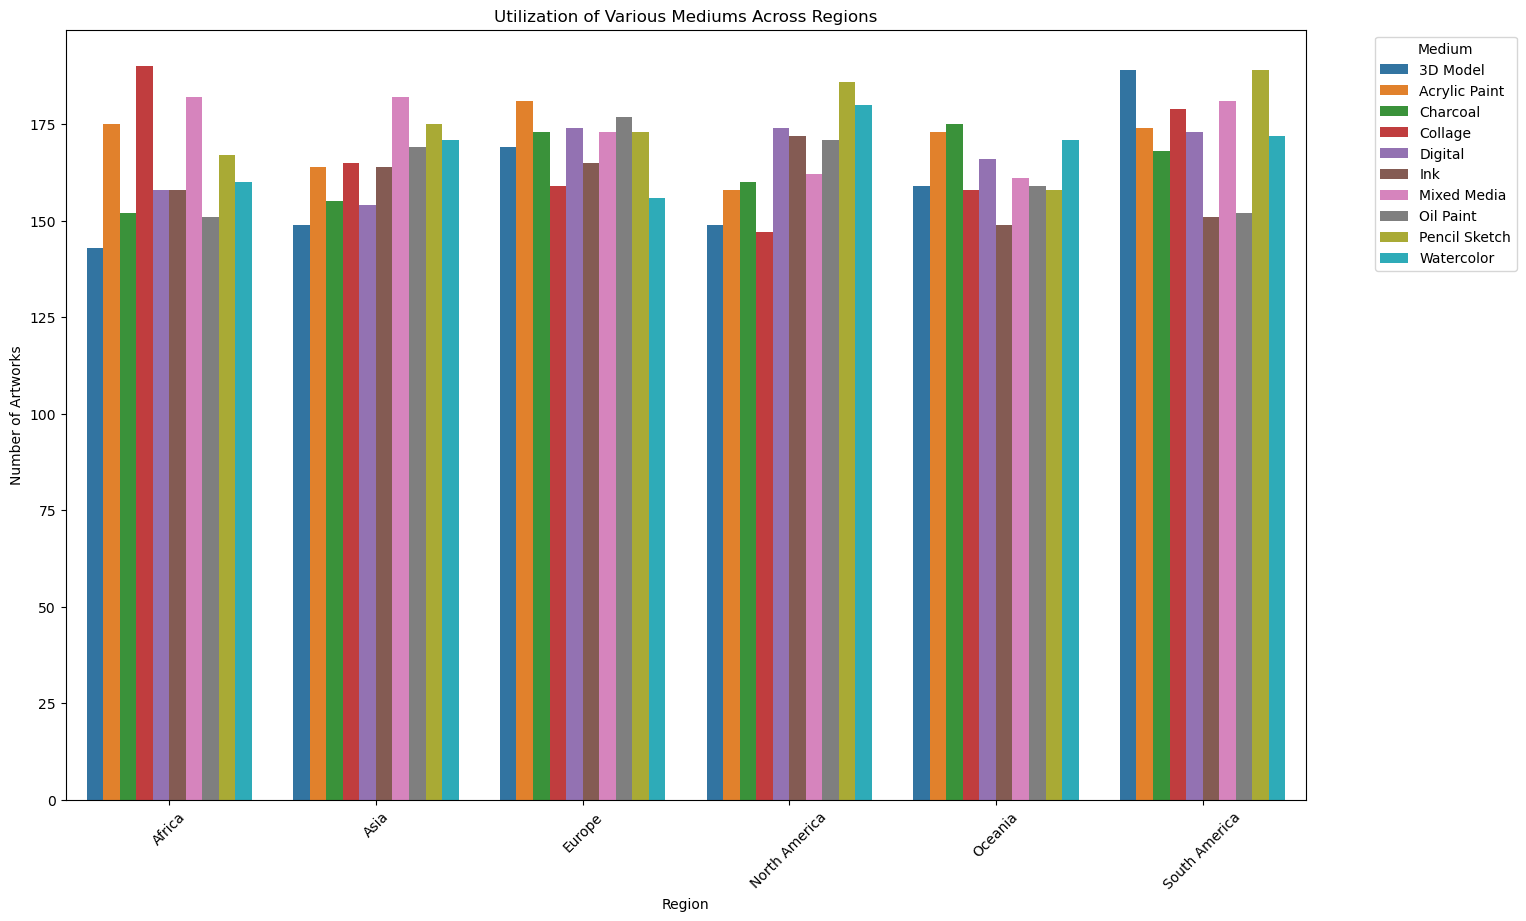

In [40]:
region_medium = df_no_outliers.groupby(['Region', 'Medium']).size().reset_index(name='Count')
plt.figure(figsize=(16, 10))
sns.barplot(x='Region', y='Count', hue='Medium', data=region_medium)
plt.title('Utilization of Various Mediums Across Regions')
plt.xlabel('Region')
plt.ylabel('Number of Artworks')
plt.xticks(rotation=45)
plt.legend(title='Medium', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

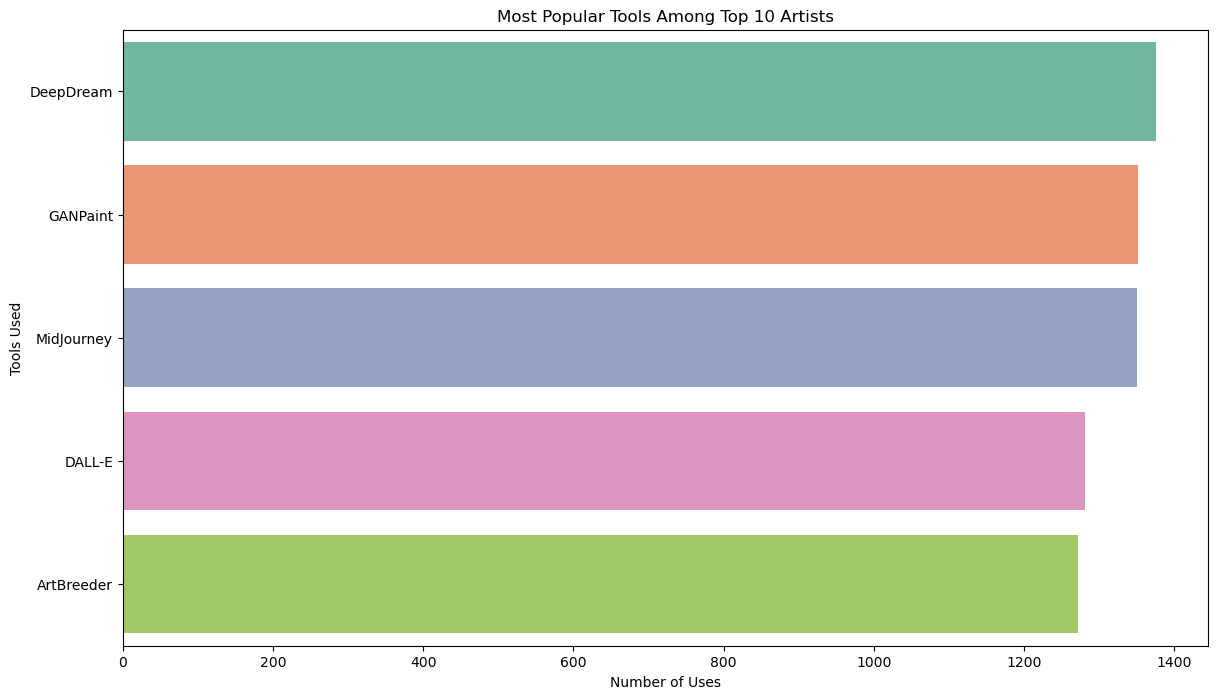

In [41]:
top_artists = df_no_outliers.groupby('Artist_Name')['Popularity_Score'].mean().sort_values(ascending=False).head(10).index
top_artists_data = df_no_outliers[df_no_outliers['Artist_Name'].isin(top_artists)]
top_tools = top_artists_data['Tools_Used'].dropna().str.split(',').explode().str.strip().value_counts().head(10).reset_index()
top_tools.columns = ['Tools_Used', 'Count']
plt.figure(figsize=(14, 8))
sns.barplot(x='Count', y='Tools_Used', data=top_tools, palette='Set2')
plt.title('Most Popular Tools Among Top 10 Artists')
plt.xlabel('Number of Uses')
plt.ylabel('Tools Used')
plt.show()